# 변경
기준일자 변수 이용하여 요일변수 생성  
시도명 -> 모두 부산광역시 이므로 제거  
행정동명, 행정동 번호 모두 같은것이므로 행정동번호 제거  
업종명, 업종코드 모두 같은것이므로 업종코드 제거  
출생년도 4067,3688 제거  
출생년도 변수 이용하여 연령대 변수 생성  
거래건수 처리 생각  
외부 데이터 이용하여 구 인구 수, 연령대 찾고 비교해볼 예정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from tqdm.notebook import tqdm

# 3.10 tensorflow x 우선 주석처리 후 모델링 할 때 다운그레이드 해야될 듯
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import load_model
# from sklearn.metrics import f1_score
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.model_selection import train_test_split
# from keras.models import load_model

In [2]:
path = "C:/Users/ekgus/Desktop/카드소비/"

In [3]:
os.listdir(path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ekgus/Desktop/카드소비/'

In [4]:
june = pd.read_csv("june.csv",encoding = 'cp949',low_memory =False)

In [5]:
july = pd.read_csv("july.csv", encoding = 'cp949', low_memory =False)

In [6]:
august = pd.read_csv("august.csv", encoding = 'cp949', low_memory = False)

In [7]:
print("june", len(june))
print("july", len(july))
print("august", len(august))
s = len(june) + len(july) + len(august)
s

june 10061735
july 9756266
august 7317159


27135160

In [12]:
df = pd.concat([june, july,august], ignore_index=True)
df

,strd_date,strd_tizn_val,ctpr_nm,ccg_nm,adn_dgnm,adng_no,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,4020,슈퍼마켓,1958,M,1,30000
27135156,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8013,주점,1998,M,1,59600
27135157,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8399,기타음료식품,1998,F,1,7500
27135158,20220801,0,부산광역시,영도구,동삼1동,21040650,하나,4010,편 의 점,1971,F,2,7600


In [13]:
print(df.isnull().sum())

strd_date        0
strd_tizn_val    0
ctpr_nm          0
ccg_nm           0
adn_dgnm         0
adng_no          0
cardc_nm         0
tpbuz_cd         0
tpbuz_nm         0
bth_yr           0
sex_cd           0
trns_cnt         0
ttl_trns_amt     0
dtype: int64


In [11]:
# 중복값 없음!
df.duplicated().sum()

0

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27135160 entries, 0 to 27135159
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   strd_date      int64 
 1   strd_tizn_val  int64 
 2   ctpr_nm        object
 3   ccg_nm         object
 4   adn_dgnm       object
 5   adng_no        int64 
 6   cardc_nm       object
 7   tpbuz_cd       int64 
 8   tpbuz_nm       object
 9   bth_yr         int64 
 10  sex_cd         object
 11  trns_cnt       int64 
 12  ttl_trns_amt   int64 
dtypes: int64(7), object(6)
memory usage: 2.6+ GB
None


In [17]:
df = df.rename(columns = {'strd_date':'기준일자', 'strd_tizn_val':'기준시간대값', 'ctpr_nm':'시도명', 'ccg_nm':'시군구명', 'adn_dgnm':'행정동명',
       'adng_no':'행정동번호', 'cardc_nm':'카드사명', 'tpbuz_cd':'업종코드', 'tpbuz_nm':'업종명', 'bth_yr':'출생년도', 'sex_cd':'성별코드',
       'trns_cnt':'거래건수', 'ttl_trns_amt':'총거래금액'})

In [18]:
df.head()

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900


In [13]:
df.describe()

,기준일자,기준시간대값,행정동번호,업종코드,출생년도,거래건수,총거래금액
count,2.713516e+07,2.713516e+07,2.713516e+07,2.713516e+07,2.713516e+07,2.713516e+07,2.713516e+07
mean,2.022070e+07,1.466897e+01,2.110182e+07,6.238941e+03,1.977280e+03,1.102882e+00,2.237177e+04
std,7.979648e+01,4.456955e+00,8.615880e+04,2.131983e+03,1.484848e+01,3.846163e-01,4.577845e+04
min,2.022060e+07,0.000000e+00,2.101051e+07,1.001000e+03,1.921000e+03,1.000000e+00,1.000000e+00
25%,2.022062e+07,1.200000e+01,2.106055e+07,4.020000e+03,1.967000e+03,1.000000e+00,4.400000e+03
50%,2.022071e+07,1.500000e+01,2.109064e+07,7.050000e+03,1.978000e+03,1.000000e+00,9.000000e+03
75%,2.022080e+07,1.800000e+01,2.112059e+07,8.006000e+03,1.989000e+03,1.000000e+00,2.200000e+04
max,2.022083e+07,2.300000e+01,2.151033e+07,9.998000e+03,4.607000e+03,7.100000e+01,2.413460e+06


In [14]:
#평균, 표준편차, quantile확인 -> 거래건수 이상치 생각해볼 필요
# min, max 에서 출생년도 잘못된 값 발견.
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,기준일자,기준시간대값,행정동번호,업종코드,출생년도,거래건수,총거래금액
count,27135160.00,27135160.00,27135160.00,27135160.00,27135160.00,27135160.00,27135160.00
mean,20220704.85,14.67,21101816.97,6238.94,1977.28,1.10,22371.77
std,79.80,4.46,86158.80,2131.98,14.85,0.38,45778.45
min,20220601.00,0.00,21010510.00,1001.00,1921.00,1.00,1.00
25%,20220620.00,12.00,21060550.00,4020.00,1967.00,1.00,4400.00
50%,20220711.00,15.00,21090640.00,7050.00,1978.00,1.00,9000.00
75%,20220802.00,18.00,21120590.00,8006.00,1989.00,1.00,22000.00
max,20220831.00,23.00,21510330.00,9998.00,4607.00,71.00,2413460.00


/var/folders/h1/rg27m62n4450v9v4ws45x37r0000gn/T/ipykernel_4659/3974799772.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


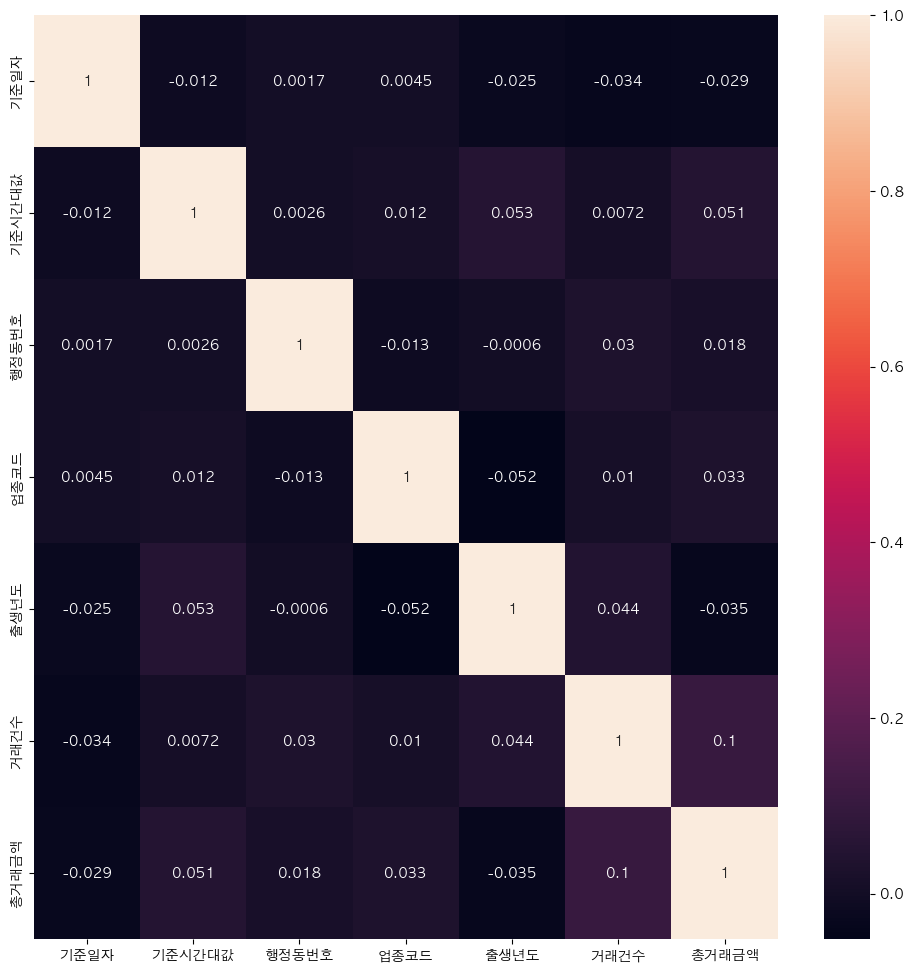

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)
#맥북용
rc('font', family='AppleGothic') ## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

/var/folders/h1/rg27m62n4450v9v4ws45x37r0000gn/T/ipykernel_4659/3886200341.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Mal

NameError: name 'rc' is not defined

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

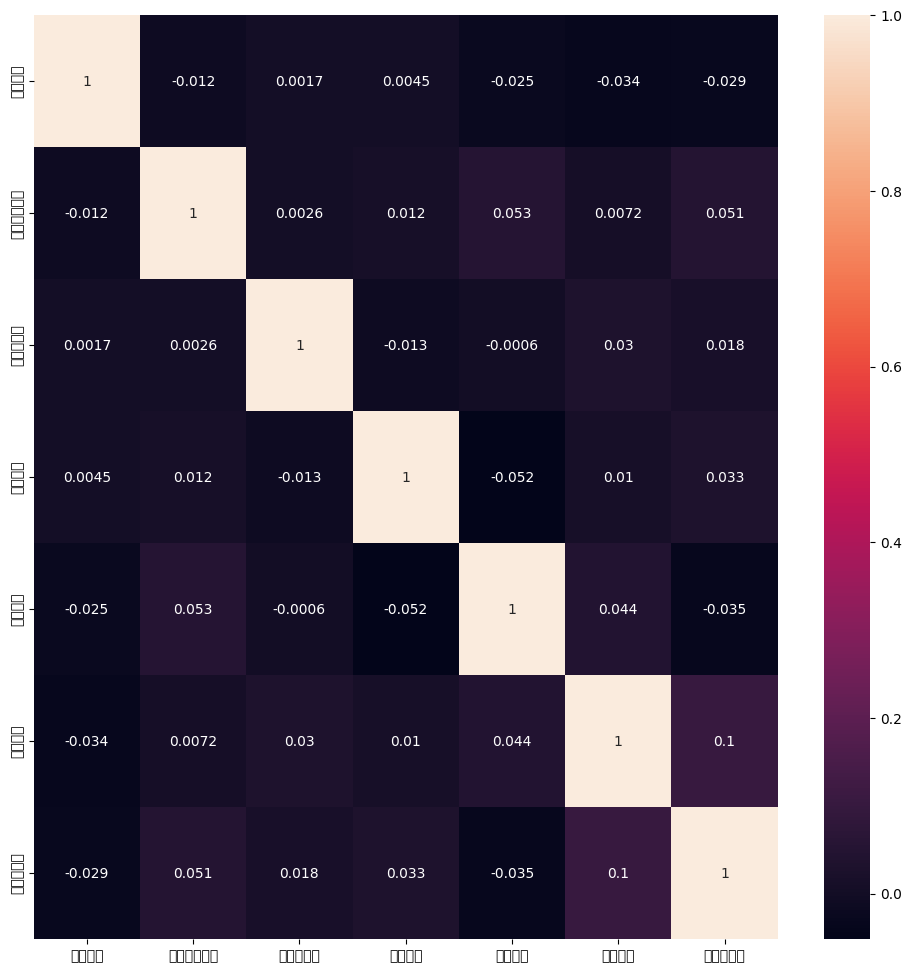

In [21]:
#변수 상관관계 확인 ->큰 상관관계 보이지 않음.
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic' #->한글 안깨지게

# ctpr_nm 시도명

In [29]:
df.시도명.unique()

array(['부산광역시'], dtype=object)

In [30]:
#데이터 전체가 부산광역시 이므로 제거
df=df.drop(['시도명'], axis=1)

In [31]:
df.head()

,기준일자,기준시간대값,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일
0,2022-06-01,0,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350,Wednesday
1,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700,Wednesday
2,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500,Wednesday
3,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700,Wednesday
4,2022-06-01,0,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900,Wednesday


# adng_no 행정동명 & 행정동번호

In [40]:
# 행정동명과 행정동 번호가 1:1 매칭이라면 둘 중 한 정보만 써도 될 것이다.
# == 만약 부산에 같은 동 이름을 가진 동네가 여러개가 아니라면..

len(df['행정동명'].unique())

205

In [41]:
df.groupby('행정동명')['행정동번호'].nunique().sum()

#행정동 번호와 행정동명 유니크 개수가 같음.-> 행정동번호 제거

205

In [91]:
df=df.drop(['행정동번호'], axis=1)

KeyError: "['행정동번호'] not found in axis"

In [92]:
df.head()

,기준일자,기준시간대값,시도명,시군구명,행정동명,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일,age,age_range
0,2022-06-01,0,부산광역시,중구,대청동,코나,4010,편 의 점,1973,M,1,7350,Wednesday,50,50
1,2022-06-01,0,부산광역시,중구,중앙동,부산,4010,편 의 점,1981,F,1,3700,Wednesday,42,40
2,2022-06-01,0,부산광역시,중구,중앙동,부산,4010,편 의 점,1992,M,1,7500,Wednesday,31,30
3,2022-06-01,0,부산광역시,중구,중앙동,부산,4010,편 의 점,1995,M,1,2700,Wednesday,28,20
4,2022-06-01,0,부산광역시,중구,중앙동,코나,4010,편 의 점,1976,M,1,13900,Wednesday,47,40


# tpbuz_nm 업종명

In [93]:
print(len(df['업종명'].unique()))
print(df.groupby('업종명')['업종코드'].nunique().sum())

#-> 모두 210. 1:1 매칭이므로 업종코드 제거

210
210


In [94]:
df=df.drop(['업종코드'], axis=1)
df.head()

,기준일자,기준시간대값,시도명,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,요일,age,age_range
0,2022-06-01,0,부산광역시,중구,대청동,코나,편 의 점,1973,M,1,7350,Wednesday,50,50
1,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1981,F,1,3700,Wednesday,42,40
2,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1992,M,1,7500,Wednesday,31,30
3,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1995,M,1,2700,Wednesday,28,20
4,2022-06-01,0,부산광역시,중구,중앙동,코나,편 의 점,1976,M,1,13900,Wednesday,47,40


# bth_yr 출생년도
삭제해야할 행이 있어서 다른 변수 보기 전에 가장 먼저 처리.

In [45]:
df.출생년도.unique()

array([1973, 1981, 1992, 1995, 1976, 1985, 1989, 1996, 1999, 1977, 1974,
       1972, 1990, 1994, 1998, 1964, 1970, 1983, 2001, 1997, 2000, 1980,
       1971, 1987, 1967, 1975, 1944, 1957, 1969, 1965, 1956, 1968, 1993,
       1991, 1979, 1963, 1982, 1961, 1988, 1978, 1966, 2003, 1962, 1986,
       2002, 1984, 2004, 1960, 1955, 1959, 2005, 2006, 1952, 1953, 1958,
       1947, 1951, 1949, 1954, 2007, 1948, 1942, 1946, 1933, 2008, 1950,
       1945, 1932, 1938, 1941, 1940, 1943, 1936, 1934, 1939, 1935, 1937,
       3688, 1929, 1931, 1925, 1930, 1928, 1923, 4607, 1921, 1924, 1927,
       1926])

In [46]:
sorted_numbers = sorted(df.출생년도.unique(), reverse=True)
print(sorted_numbers)  
#4067,3688 ?

[4607, 3688, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1921]


In [54]:
df['출생년도'].value_counts()
#4607 : 44, 3688: 97 ->제거

1981    731958
1980    728531
1979    712602
1982    705880
1971    652587
         ...  
1921        94
1924        48
4607        44
1927        30
1926         3
Name: 출생년도, Length: 89, dtype: int64

In [47]:
df[df['출생년도']==4607]

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일
420492,2022-06-02,11,부산광역시,부산진구,부전2동,21050520,하나,8001,일반한식,4607,M,1,14500,Thursday
832378,2022-06-03,12,부산광역시,동래구,안락2동,21060620,코나,3309,쌍용S-OIL,4607,M,1,4000,Friday
832520,2022-06-03,12,부산광역시,동래구,안락2동,21060620,하나,3309,쌍용S-OIL,4607,M,1,47000,Friday
1102600,2022-06-03,21,부산광역시,동래구,명륜동,21060650,하나,4499,기타잡화,4607,M,1,1300,Friday
1130948,2022-06-03,23,부산광역시,동래구,사직3동,21060600,하나,1123,택시,4607,M,1,6700,Friday
1601709,2022-06-05,12,부산광역시,사상구,괘법동,21150570,하나,9301,레져업소,4607,M,1,40000,Sunday
1699304,2022-06-05,18,부산광역시,부산진구,당감4동,21050700,하나,8001,일반한식,4607,M,1,88000,Sunday
1936386,2022-06-06,15,부산광역시,해운대구,반여1동,21090700,하나,8013,주점,4607,M,1,20000,Monday
2423254,2022-06-07,20,부산광역시,부산진구,부전2동,21050520,하나,8013,주점,4607,M,1,56000,Tuesday
2509403,2022-06-08,9,부산광역시,사상구,덕포2동,21150560,하나,8301,제과점,4607,M,1,1500,Wednesday


In [33]:
df[df['출생년도']==3688]

,strd_date,strd_tizn_val,ccg_nm,adn_dgnm,adng_no,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt,day_name
68381,2022-06-01,11,해운대구,우2동,21090740,하나,8006,서양음식,3688,F,1,4500,Wednesday
144065,2022-06-01,14,중구,보수동,21010540,하나,8301,제과점,3688,F,1,4250,Wednesday
169975,2022-06-01,14,수영구,망미2동,21140550,코나,8006,서양음식,3688,F,1,12000,Wednesday
198852,2022-06-01,15,수영구,민락동,21140600,코나,8301,제과점,3688,F,2,15000,Wednesday
298256,2022-06-01,19,해운대구,우2동,21090740,하나,4020,슈퍼마켓,3688,F,1,11300,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24962252,2022-08-20,15,부산진구,부전2동,21050520,하나,4201,정장(남성),3688,F,1,17000,Saturday
25407299,2022-08-22,18,해운대구,좌1동,21090660,하나,8006,서양음식,3688,F,1,5200,Monday
25454904,2022-08-22,22,해운대구,우2동,21090740,하나,4020,슈퍼마켓,3688,F,1,5900,Monday
25525403,2022-08-23,12,해운대구,우1동,21090730,하나,8006,서양음식,3688,F,1,7000,Tuesday


In [57]:
# 4607, 3688 str 으로 처리해서 삭제가 안됐었음..! int로 변경
df.drop(df[df['출생년도']==4607].index ,inplace=True, axis = 0)
df.drop(df[df['출생년도']==3688].index ,inplace=True, axis = 0)

In [58]:
df.groupby(['출생년도'])['총거래금액'].mean()

출생년도
1921     11018.510638
1923     15085.395683
1924     34360.416667
1925     28350.810811
1926    516666.666667
            ...      
2004     21994.010332
2005     27909.459305
2006     34895.441395
2007     40207.724252
2008     36297.669688
Name: 총거래금액, Length: 87, dtype: float64

In [49]:
df[df['출생년도']==1926]

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일
9371322,2022-06-28,14,부산광역시,수영구,민락동,21140600,코나,7010,병원(응급실 운영),1926,F,1,650000,Tuesday
18839249,2022-07-28,13,부산광역시,수영구,민락동,21140600,코나,7010,병원(응급실 운영),1926,F,2,600000,Thursday
26357044,2022-08-27,12,부산광역시,수영구,민락동,21140600,코나,7010,병원(응급실 운영),1926,F,1,300000,Saturday


In [59]:
#나이변수 생성
df['age']=2022-df['출생년도']+1

In [60]:
df['age'].unique()

array([ 50,  42,  31,  28,  47,  38,  34,  27,  24,  46,  49,  51,  33,
        29,  25,  59,  53,  40,  22,  26,  23,  43,  52,  36,  56,  48,
        79,  66,  54,  58,  67,  55,  30,  32,  44,  60,  41,  62,  35,
        45,  57,  20,  61,  37,  21,  39,  19,  63,  68,  64,  18,  17,
        71,  70,  65,  76,  72,  74,  69,  16,  75,  81,  77,  90,  15,
        73,  78,  91,  85,  82,  83,  80,  87,  89,  84,  88,  86,  94,
        92,  98,  93,  95, 100, 102,  99,  96,  97])

In [63]:
# age변수 이용하여 연령대 변수 생성
# 0s 에서 int 형으로 변경..

# conditionlist=[(df['age']<10), (df['age']>=10) & (df['age']<20), (df['age']>=20) & (df['age']<30), (df['age']>=30) & (df['age']<40),
#               (df['age']>=40)&(df['age']<50), (df['age']>=50)&(df['age']<60),(df['age']>=60)&(df['age']<70),
#               (df['age']>=70)&(df['age']<80),(df['age']>=80)&(df['age']<90),(df['age']>=90)&(df['age']<100),
#                (df['age']>=100)]
# choicelist=[0,10,20,30,40,50,60,70,80,90,100]
# df['age_range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [110]:
# *조건절 필요 없이 10으로 나눈 몫에 *10 하면 됨.!!!!*
df['age_range'] = df['age']//10*10

In [111]:
df

,기준일자,기준시간대값,시도명,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,요일,age,age_range
0,2022-06-01,0,부산광역시,중구,대청동,코나,편 의 점,1973,M,1,7350,Wednesday,50,50
1,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1981,F,1,3700,Wednesday,42,40
2,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1992,M,1,7500,Wednesday,31,30
3,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1995,M,1,2700,Wednesday,28,20
4,2022-06-01,0,부산광역시,중구,중앙동,코나,편 의 점,1976,M,1,13900,Wednesday,47,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,2022-08-01,0,부산광역시,영도구,동삼1동,코나,슈퍼마켓,1958,M,1,30000,Monday,65,60
27135156,2022-08-01,0,부산광역시,영도구,동삼1동,코나,주점,1998,M,1,59600,Monday,25,20
27135157,2022-08-01,0,부산광역시,영도구,동삼1동,코나,기타음료식품,1998,F,1,7500,Monday,25,20
27135158,2022-08-01,0,부산광역시,영도구,동삼1동,하나,편 의 점,1971,F,2,7600,Monday,52,50


# 기준일자

In [27]:
#strd_date type변환
df=df.astype({'기준일자' : str})

In [28]:
df['기준일자']=pd.to_datetime(df['기준일자'])

In [29]:
df.head()

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액
0,2022-06-01,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,2022-06-01,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,2022-06-01,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,2022-06-01,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,2022-06-01,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900


In [30]:
from datetime import datetime
df['기준일자']

0          2022-06-01
1          2022-06-01
2          2022-06-01
3          2022-06-01
4          2022-06-01
              ...    
27135155   2022-08-01
27135156   2022-08-01
27135157   2022-08-01
27135158   2022-08-01
27135159   2022-08-01
Name: 기준일자, Length: 27135160, dtype: datetime64[ns]

In [32]:
#day_name(요일) 생성
df['요일']=df['기준일자'].dt.day_name()
df

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일
0,2022-06-01,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350,Wednesday
1,2022-06-01,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700,Wednesday
2,2022-06-01,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500,Wednesday
3,2022-06-01,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700,Wednesday
4,2022-06-01,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,2022-08-01,0,부산광역시,영도구,동삼1동,21040650,코나,4020,슈퍼마켓,1958,M,1,30000,Monday
27135156,2022-08-01,0,부산광역시,영도구,동삼1동,21040650,코나,8013,주점,1998,M,1,59600,Monday
27135157,2022-08-01,0,부산광역시,영도구,동삼1동,21040650,코나,8399,기타음료식품,1998,F,1,7500,Monday
27135158,2022-08-01,0,부산광역시,영도구,동삼1동,21040650,하나,4010,편 의 점,1971,F,2,7600,Monday


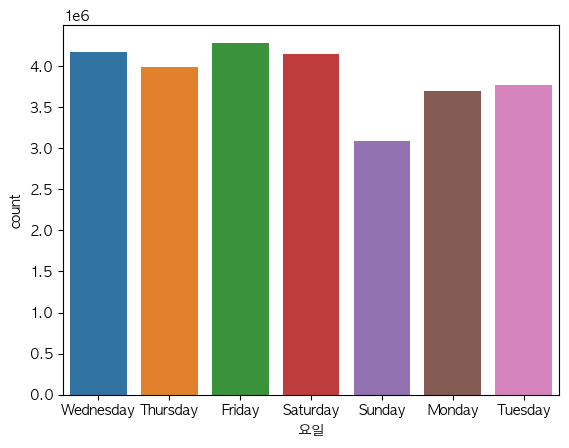

In [65]:
sns.countplot(data=df, x="요일")
plt.show()

In [79]:
from pandas import DataFrame
# 달력 시퀀스 생성
day_count['date']= DataFrame(pd.date_range(start = '2022-06-01', end = '2022-08-31'))
day_count

,date
0,2022-06-01
2,2022-06-03
3,2022-06-04
4,2022-06-05
5,2022-06-06
...,...
87,2022-08-27
88,2022-08-28
89,2022-08-29
90,2022-08-30


In [80]:
day_count['day']=day_count['date'].dt.day_name()

,date,day
0,2022-06-01,Wednesday
2,2022-06-03,Friday
3,2022-06-04,Saturday
4,2022-06-05,Sunday
5,2022-06-06,Monday
...,...,...
87,2022-08-27,Saturday
88,2022-08-28,Sunday
89,2022-08-29,Monday
90,2022-08-30,Tuesday


In [84]:
day_count['month']=day_count['date'].dt.month

In [86]:
day_count.groupby(['month','day']).nunique()

date
month day            
6     Friday        4
      Monday        4
      Saturday      4
      Sunday        4
      Thursday      4
      Tuesday       4
      Wednesday     5
7     Friday        5
      Monday        4
      Saturday      5
      Sunday        5
      Thursday      4
      Tuesday       4
      Wednesday     4
8     Friday        4
      Monday        5
      Saturday      4
      Sunday        4
      Thursday      4
      Tuesday       5
      Wednesday     5

In [43]:
# 월별 데이터 개수 확인 (문자 slice 에서 datetime 함수 사용으로 변경)
df_date = df['기준일자'].dt.month
df_date.value_counts()

6    10061735
7     9756266
8     7317159
Name: 기준일자, dtype: int64

# strd_tizn_val 기준시간대값

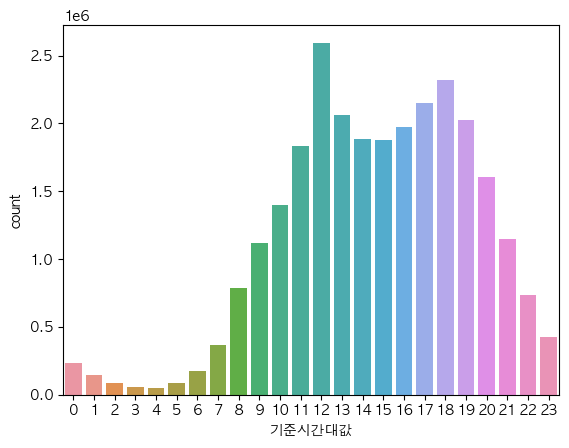

In [87]:
sns.countplot(data=df, x="기준시간대값")
plt.show()

12    2594249
18    2317544
17    2149852
13    2064385
19    2022080
16    1973444
14    1884563
15    1879940
11    1835542
20    1602146
10    1396157
21    1145898
9     1115819
8      790217
22     732863
23     423246
7      365718
0      236182
6      176698
1      141841
2       89931
5       84899
3       59274
4       52672
Name: 기준시간대값, dtype: int64


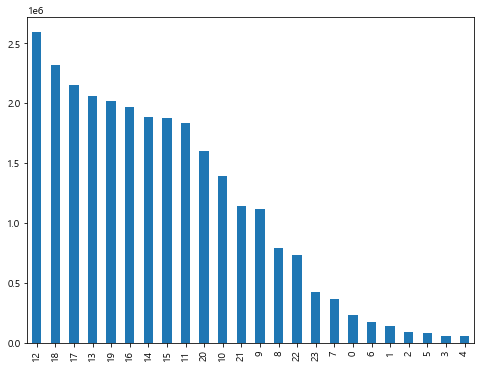

In [27]:
df.기준시간대값.value_counts().plot.bar(figsize=(8,6))
print(df.기준시간대값.value_counts())
#12시가 가장 많고, 그다음 18시가 많음

기준시간대값
0    15800.09
1    15308.09
2    13455.86
3    12611.47
4    12234.27
5    15096.61
6    16306.93
7    13849.94
8    11390.90
9    17231.34
10   21452.52
11   21741.54
12   20856.30
13   22486.68
14   24141.43
15   24454.01
16   24028.62
17   23696.53
18   24084.36
19   26627.30
20   26829.50
21   23226.25
22   19304.12
23   17664.32
Name: 총거래금액, dtype: float64

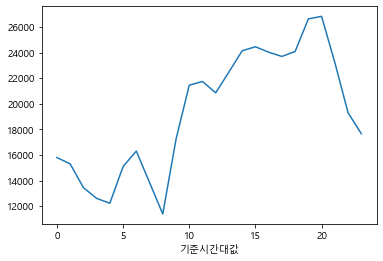

In [28]:
#시간대별 총 거래금액 평균 확인 -> 20시가 가장 많음
df.groupby(['기준시간대값'])['총거래금액'].mean().plot()
df.groupby(['기준시간대값'])['총거래금액'].mean()

# ccg_nm 시군구명

In [38]:
df.시군구명.unique()

array(['중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구',
       '금정구', '강서구', '연제구', '수영구', '사상구', '기장군'], dtype=object)

In [32]:
# 시군구명 별 갯수 확인
df['시군구명'].value_counts()

부산진구    3568514
해운대구    3075269
동래구     2504967
금정구     2151442
사하구     2004888
북구      1995622
연제구     1912041
남구      1881526
수영구     1595591
사상구     1489445
강서구     1336118
기장군      963690
동구       726398
서구       691524
중구       655696
영도구      582429
Name: 시군구명, dtype: int64

In [89]:
# 시군구 별 평균 총거래금액 확인
# 정렬 한 코드로 합침.
df.groupby(['시군구명'])['총거래금액'].mean().sort_values()

시군구명
영도구     18426.611664
동구      18813.415060
서구      19153.764237
금정구     20321.633018
남구      20809.788367
사하구     21336.540398
연제구     21918.375532
사상구     22084.731404
북구      22295.886548
수영구     22494.493454
부산진구    22537.264563
중구      22606.129685
동래구     23766.308663
해운대구    23915.051654
강서구     26168.159139
기장군     26240.119858
Name: 총거래금액, dtype: float64

In [96]:
#시군구별 연령대 평균
df.groupby(['시군구명'])['age'].mean()
#강서구 가장 낮고, 동래구가 가장 높아보임 -> 외부 데이터 이용하여 확인해볼 예정

시군구명
강서구     44.031559
금정구     44.649244
기장군     45.688314
남구      45.055809
동구      46.097962
동래구     46.638741
부산진구    44.638833
북구      46.360561
사상구     45.885624
사하구     46.432772
서구      46.008630
수영구     45.942712
연제구     46.608403
영도구     47.233076
중구      45.537636
해운대구    46.187694
Name: age, dtype: float64

# cardc_nm 카드사명

In [43]:
df.카드사명.unique()

array(['코나', '부산', '하나', '동백택시', '농협', 'QR'], dtype=object)

In [44]:
#카드사명 별 사용개수 확인 -> 코나 (:코나아이) 가장 많이 사용
df['카드사명'].value_counts()

코나      14474787
하나       6781004
부산       5358627
농협        346273
동백택시      144603
QR         29866
Name: 카드사명, dtype: int64

In [45]:
#그래프로 확인
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' #->한글 안깨지게

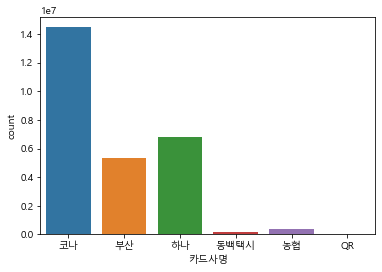

In [46]:
sns.countplot(data=df, x="카드사명")
plt.show()

# sex_cd 성별코드

In [57]:
df['성별코드'].value_counts()

F    14912119
M    12223041
Name: sex_cd, dtype: int64

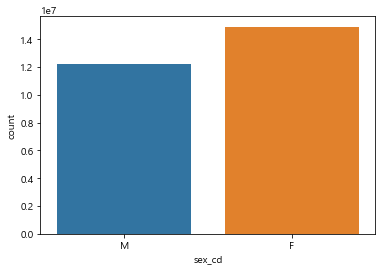

In [58]:
sns.countplot(data=df, x="성별코드")
plt.show()

In [11]:
df.groupby(['성별코드'])['총거래금액'].mean()

sex_cd
F    22919.131814
M    21703.987836
Name: ttl_trns_amt, dtype: float64

<AxesSubplot:xlabel='sex_cd', ylabel='ttl_trns_amt'>

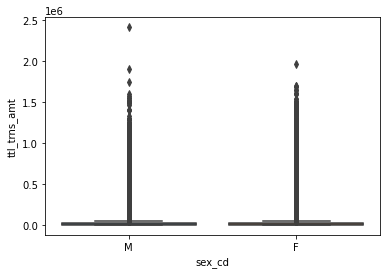

In [10]:
sns.boxplot(x = '성별코드', y = '총거래금액', data = df)

# trns_cnt 거래건수

In [59]:
df.거래건수.unique()

array([ 1,  2,  3,  4,  5,  6, 10,  7,  8, 11, 30,  9, 12, 13, 24, 40, 20,
       15, 14, 21, 16, 17, 19, 18, 22, 28, 55, 23, 31, 26, 29, 37, 34, 27,
       56, 71, 57, 35, 36, 38, 41, 64, 25, 32, 63], dtype=int64)

In [101]:
df['거래건수'].value_counts()

1     24823690
2      1964619
3       264914
4        55319
5        15612
6         5727
7         2323
8         1119
9          569
10         350
11         227
12         136
13         114
14          64
15          47
16          32
17          28
18          18
20          17
19          15
22          11
24          10
21           8
40           6
23           5
30           5
26           4
31           4
28           4
29           3
32           2
27           2
41           2
38           2
36           1
25           1
64           1
34           1
35           1
57           1
71           1
56           1
37           1
55           1
63           1
Name: 거래건수, dtype: int64

In [104]:
df[df['거래건수']==40]

,기준일자,기준시간대값,시도명,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,요일,age,age_range
300998,2022-06-01,19,부산광역시,금정구,장전1동,하나,사무용 OA기기,1997,F,40,7000,Wednesday,26,20
10251335,2022-07-01,17,부산광역시,동구,수정2동,부산,편 의 점,1984,F,40,160800,Friday,39,30
13203105,2022-07-10,15,부산광역시,사상구,주례2동,코나,사무서비스,2000,F,40,6720,Sunday,23,20
22931710,2022-08-12,9,부산광역시,서구,동대신1동,부산,편 의 점,1946,F,40,180000,Friday,77,70
23067550,2022-08-12,16,부산광역시,동구,수정2동,부산,편 의 점,1984,F,40,172500,Friday,39,30
26059010,2022-08-25,21,부산광역시,동래구,온천2동,농협,편 의 점,1980,F,40,127000,Thursday,43,40


# ttl_trns_amt 총거래금액

In [108]:
df.sort_values(by=['총거래금액'], ascending = False).head()

,기준일자,기준시간대값,시도명,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,요일,age,age_range
3674873,2022-06-11,10,부산광역시,해운대구,좌1동,하나,한방병원,1984,M,9,2413460,Saturday,39,30
15676481,2022-07-18,9,부산광역시,동구,범일2동,부산,산후조리원,1987,F,1,1970000,Monday,36,30
5803091,2022-06-17,11,부산광역시,북구,덕천2동,코나,주차장,1980,M,2,1906000,Friday,43,40
12378504,2022-07-08,10,부산광역시,해운대구,반여1동,코나,학원,1983,M,2,1748000,Friday,40,40
6987356,2022-06-20,16,부산광역시,연제구,연산5동,코나,치과의원,1978,F,1,1700000,Monday,45,40
